# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### Problem

The issue being looked at in this project is predicting the correct salary to offer to new hires.  The company will want to be able to offer competitive salaries to acquire the best talent available while also being conscious of budgetary constraints.  The project will look at the features that most effect the salary to create a model that can accurately predict the salary an individual should receive based on that individuals features.       

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

__author__ = "Becky Weirich"
__email__ = "b.weirich@yahoo.com"

## Part 2 - DISCOVER

### Load the data

In [2]:
train_feat_df = pd.read_csv('data/train_features.csv')
train_sal_df = pd.read_csv('data/train_salaries.csv')
test_feat_df = pd.read_csv('data/test_features.csv')

### Clean the data

A review of the datasets imported to see information that has been given.

In [3]:
train_feat_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_feat_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_sal_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


### Lengths and Data Types

A review of the data types of each column and to insure there is no missing data in any of the columns.

In [6]:
train_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Check for Duplicates

In [9]:
train_feat_df.duplicated().sum()

0

In [10]:
train_sal_df.duplicated().sum()

0

In [11]:
test_feat_df.duplicated().sum()

0

### Explore the data (EDA)

### Summary of Variables

Exploration of the features stats first with the numerical features and secondly with the categorical features.

In [12]:
train_feat_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [13]:
train_feat_df.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685140612,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge Training Dataframes

Create one dataset for all the training data available so the our target (salary) will be included.

In [14]:
train_df = pd.merge(train_feat_df, train_sal_df, on='jobId')

In [15]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### Salary Distribution

Explore the target to discover the distribution and remove any missing or corrupted data that might exist to insure the model has the cleanest data to form predictions on.

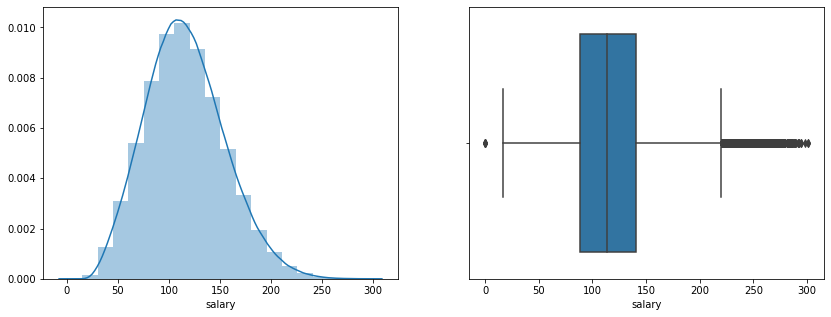

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(train_df.salary,bins=20)
plt.subplot(1,2,2)
sns.boxplot(train_df.salary)

### Review Outliers

In [18]:
train_df.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [19]:
IQR = 141.0 - 88.0
up_q = 141.0 + 1.5 * IQR
lw_q = 88.0 - 1.5 * IQR
print('IQR: ',IQR)
print('Upper Quartile: ',up_q)
print('Lower Quartile: ',lw_q)

IQR:  53.0
Upper Quartile:  220.5
Lower Quartile:  8.5


In [20]:
train_df[train_df.salary < lw_q]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


The job postings that list a salary of 0 are corrupt or missing data and will need to be removed.

In [21]:
train_df = train_df[train_df.salary > lw_q]

In [22]:
train_df[train_df.salary > up_q].groupby('jobType')['salary'].count()

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: salary, dtype: int64

In [23]:
train_df[(train_df.salary > up_q) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The upper outliers appear to be valid.  The roles and industries are generally higher paying.  The entries will not be removed.

### Visualization of Variables

Exploration of the feature variables and how they are associated with salary.

In [24]:
def plotCat (df, col):
    plt.figure(figsize=(10,5))
    mean = df.groupby(col)['salary'].mean().sort_values().index
    sns.boxplot(data=df, x=col, y='salary',order=mean)

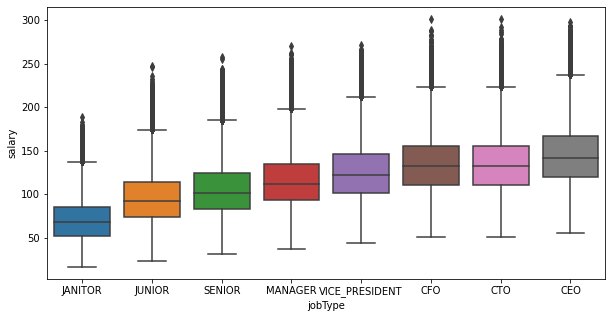

In [25]:
plotCat(train_df,'jobType')

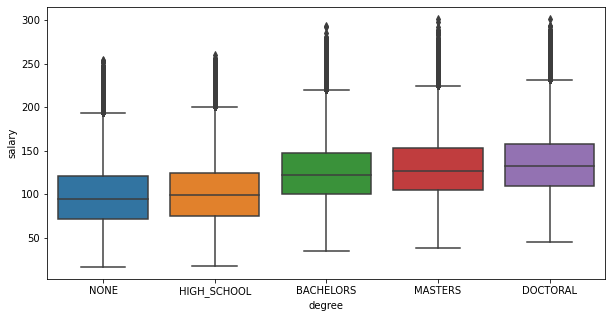

In [26]:
plotCat(train_df, 'degree')

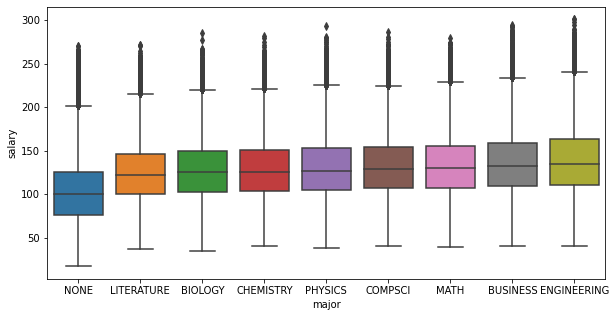

In [27]:
plotCat(train_df,'major')

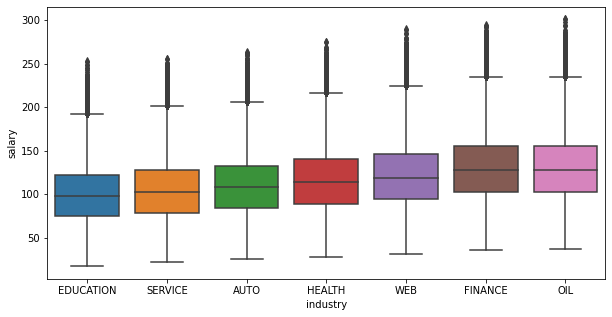

In [28]:
plotCat(train_df,'industry')

In [29]:
def plotNum (df, col):
    plt.figure(figsize=(10,5))
    mean = df.groupby(col)['salary'].mean()
    std = df.groupby(col)['salary'].std()
    mean.plot()
    plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values,alpha=0.3)

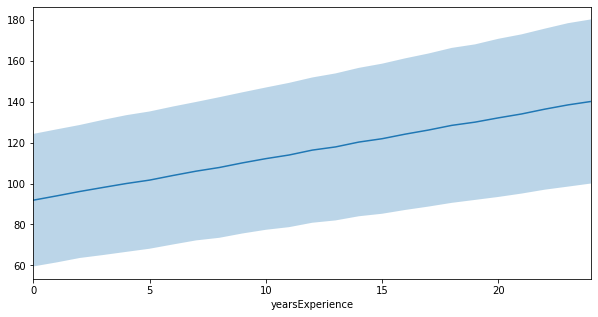

In [30]:
plotNum(train_df, 'yearsExperience')

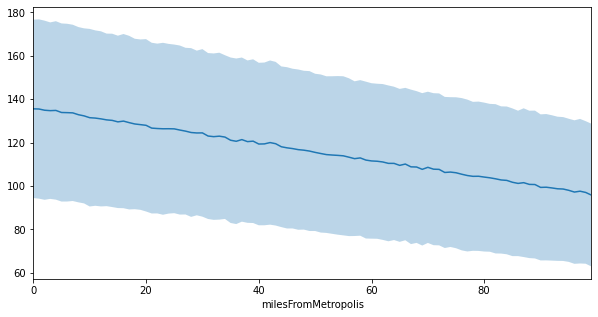

In [31]:
plotNum(train_df, 'milesFromMetropolis')

### Correlation

Discover the level of correlation between the variables to better understand how the variables are associated with one another. 

In [32]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].astype('category')

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null category
companyId              999995 non-null category
jobType                999995 non-null category
degree                 999995 non-null category
major                  999995 non-null category
industry               999995 non-null category
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: category(6), int64(3)
memory usage: 126.7 MB


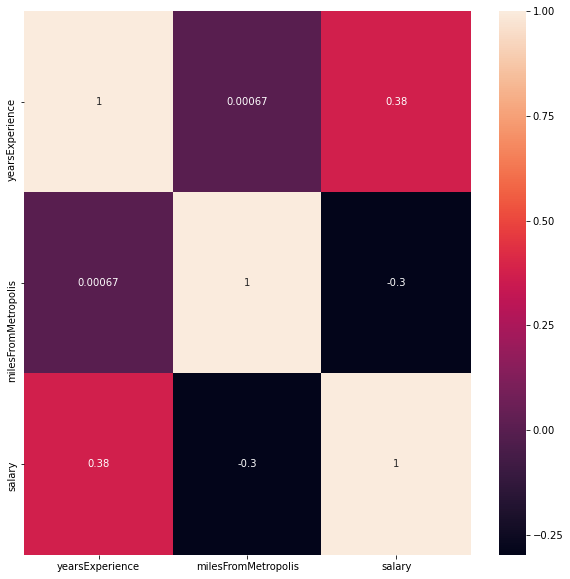

In [34]:
plt.figure(figsize=(10,10))
features = ['companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']

sns.heatmap(train_df[features + ['salary']].corr(), annot=True)

### One-Hot Encoding 

Create numerical values for the categorical variables to use in the model.

In [35]:
cat_dummies = pd.get_dummies(train_df[['companyId','jobType','degree','major','industry']],drop_first=True)
new_train_df = pd.concat([train_df, cat_dummies], axis=1)

In [36]:
new_train_df.shape

(999995, 96)

In [37]:
cat_dum = pd.get_dummies(test_feat_df[['companyId','jobType','degree','major','industry']],drop_first=True)
new_test_df = pd.concat([test_feat_df, cat_dum], axis=1)

In [38]:
new_test_df.shape

(1000000, 95)

### Establish a baseline 

The goal is a Mean Square Error (MSE) less than 360.

### Hypothesize solution 

I have chosen to use the Linear Regression, Random Forest and Gradient Boosting models to test to find the mosts accurate model predictions.

In [39]:
new_train_df.drop(['jobId','companyId','jobType','degree','major','industry'], axis=1, inplace=True)
new_test_df.drop(['jobId','companyId','jobType','degree','major','industry'], axis=1, inplace=True)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [41]:
target = new_train_df['salary']
features = new_train_df.drop(['salary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

## Part 3 - DEVELOP

In [42]:
def pred_real_kde(predict, real):
    ax1 = sns.kdeplot(predict, color='b', label='Predicted Values')
    sns.kdeplot(real, color='r', label='Real Values', ax=ax1)

### Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [44]:
print('Linear Regression MSE: ', mean_squared_error(lr_predict, y_test))

Linear Regression MSE:  384.1606070587602


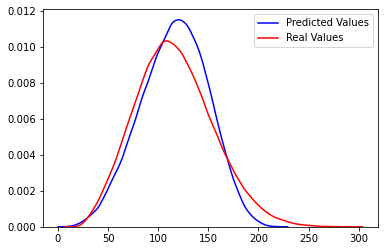

In [45]:
pred_real_kde(lr_predict, y_test)

In [46]:
print('Linear Regression Cross Validation Mean: ', cross_val_score(lr, features, target).mean())

Linear Regression Cross Validation Mean:  0.743535259165873


## Random Forest

In [47]:
rf = RandomForestRegressor(n_estimators=200, max_depth=25, min_samples_split=25)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [48]:
print('Linear Regression MSE: ', mean_squared_error(rf_predict, y_test))

Linear Regression MSE:  378.37932514174764


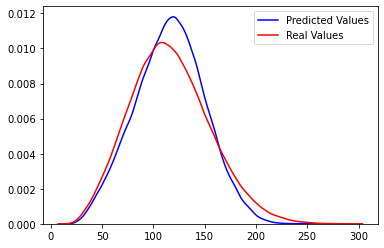

In [49]:
pred_real_kde(rf_predict, y_test)

In [50]:
print('Random Forest Cross Validation Mean: ', cross_val_score(rf, features, target).mean())

Random Forest Cross Validation Mean:  0.7480956969441988


## Gradient Boosting

In [51]:
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.8)
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)

In [52]:
print('Gradient Boosting MSE: ', mean_squared_error(gb_predict, y_test))

Gradient Boosting MSE:  357.47417592611345


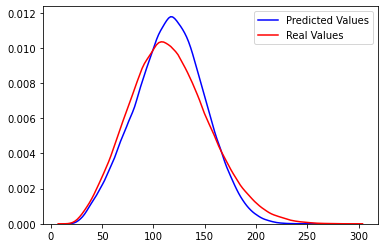

In [53]:
pred_real_kde(gb_predict, y_test)

In [54]:
print('Gradient Boosting Cross Validation Mean: ', cross_val_score(gb, features, target).mean())

Gradient Boosting Cross Validation Mean:  0.7619894730994023


### Select best model 

Based on the baseline goal of a MSE less the 360 the best model is Gradient Boosting with a MSE of 357.47.

## Part 4 - DEPLOY

The Gradient Boosting model is used on the test dataset to predict salaries.  The importance of the features in the predictions is reviewed to see what features most affect the predictions.  

In [55]:
salary_predict = gb.predict(new_test_df)

In [56]:
np.savetxt('salary_predictions.csv', salary_predict, delimiter=',')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

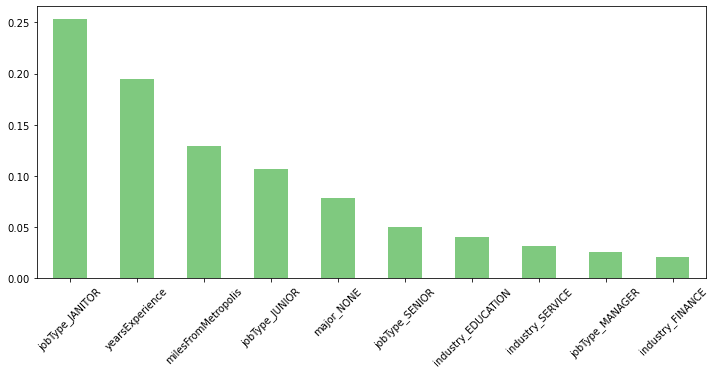

In [57]:
feat_imp = pd.Series(gb.feature_importances_, index=new_test_df.columns)
feat_imp.nlargest(10).plot(kind='bar', figsize=(12,5), cmap='Accent', title='Feautre Importance')
plt.xticks(rotation=45)